In [116]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

In [117]:
#Load the CSV path 
path = "../Project 1 Code/Raw Data/converted_data.csv"

#Read CSV file
inflation_df = pd.read_csv(path,encoding="ISO-8859-1")

inflation_df

,Date,Oil Price,cpi_all_items,cpi_all_items_minus,cpi_food,cpi_energy,cpi_gas,total_mfg_ind,petrol_grease_mfg,ind_gas_mfg,oil_gas_machine_equip_mfg,supermarkets_grocery_stores,truck_transp
0,01/01/12,113.06,226.67,227.24,232.67,236.94,290.76,191.10,450.40,134.70,234.10,161.70,128.70
1,02/01/12,122.66,227.66,227.87,232.49,242.66,305.08,192.10,447.60,134.90,235.70,164.20,129.10
2,03/01/12,122.88,229.39,228.74,232.79,253.60,329.78,194.30,450.00,134.90,234.40,164.00,130.50
3,04/01/12,123.43,230.09,229.30,233.23,255.74,335.74,194.70,450.40,136.70,234.80,163.60,130.90
4,05/01/12,101.87,229.82,229.60,233.34,250.31,323.60,193.60,449.50,133.80,234.60,165.60,130.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,03/01/22,107.91,287.50,289.31,295.73,298.25,366.50,245.40,541.18,230.89,294.22,231.11,198.15
123,04/01/22,109.34,289.11,290.85,298.71,298.47,362.80,249.83,566.07,231.24,302.83,234.69,200.87
124,05/01/22,114.81,292.30,292.51,302.04,316.76,391.26,256.58,565.31,234.72,304.70,238.95,203.87
125,06/01/22,110.01,296.31,294.68,305.04,340.92,430.14,262.83,595.44,236.33,306.22,247.04,202.80


In [118]:
inflation_df = inflation_df.set_index("Date")

In [119]:
inflation_df

,Oil Price,cpi_all_items,cpi_all_items_minus,cpi_food,cpi_energy,cpi_gas,total_mfg_ind,petrol_grease_mfg,ind_gas_mfg,oil_gas_machine_equip_mfg,supermarkets_grocery_stores,truck_transp
Date,,,,,,,,,,,,
01/01/12,113.06,226.67,227.24,232.67,236.94,290.76,191.10,450.40,134.70,234.10,161.70,128.70
02/01/12,122.66,227.66,227.87,232.49,242.66,305.08,192.10,447.60,134.90,235.70,164.20,129.10
03/01/12,122.88,229.39,228.74,232.79,253.60,329.78,194.30,450.00,134.90,234.40,164.00,130.50
04/01/12,123.43,230.09,229.30,233.23,255.74,335.74,194.70,450.40,136.70,234.80,163.60,130.90
05/01/12,101.87,229.82,229.60,233.34,250.31,323.60,193.60,449.50,133.80,234.60,165.60,130.80
...,...,...,...,...,...,...,...,...,...,...,...,...
03/01/22,107.91,287.50,289.31,295.73,298.25,366.50,245.40,541.18,230.89,294.22,231.11,198.15
04/01/22,109.34,289.11,290.85,298.71,298.47,362.80,249.83,566.07,231.24,302.83,234.69,200.87
05/01/22,114.81,292.30,292.51,302.04,316.76,391.26,256.58,565.31,234.72,304.70,238.95,203.87


In [120]:
inflation_df.dtypes

Oil Price                      float64
cpi_all_items                  float64
cpi_all_items_minus            float64
cpi_food                       float64
cpi_energy                     float64
cpi_gas                        float64
total_mfg_ind                  float64
petrol_grease_mfg              float64
ind_gas_mfg                    float64
oil_gas_machine_equip_mfg      float64
supermarkets_grocery_stores    float64
truck_transp                   float64
dtype: object

In [121]:
inflation_df["Oil Price"].describe()


count    127.000000
mean      74.050315
std       26.051349
min       25.270000
25%       52.515000
50%       66.600000
75%      102.015000
max      123.430000
Name: Oil Price, dtype: float64

In [122]:
inflation_df["cpi_all_items"].describe()

count    127.000000
mean     248.205906
std       15.939371
min      226.670000
25%      236.410000
50%      244.520000
75%      256.865000
max      296.310000
Name: cpi_all_items, dtype: float64

The r-square is: 0.023566620248677658
The correlation between both factors is -0.15


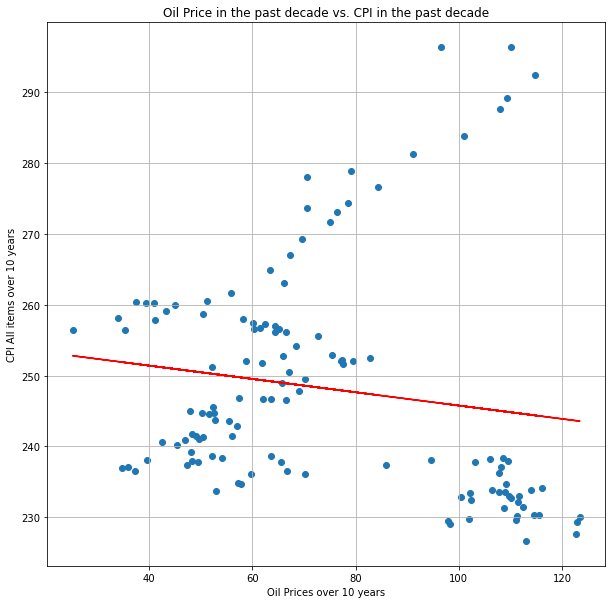

In [123]:
#Scatter graph Oil Prices vs CPI All Items with Linear Regression 
x_values = inflation_df["Oil Price"]
y_values = inflation_df["cpi_all_items"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept 
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize = (10,10))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,"r-")

plt.annotate(line_eq,(20,10),fontsize=15,color="red")

plt.title("Oil Price in the past decade vs. CPI in the past decade")
plt.xlabel("Oil Prices over 10 years")
plt.ylabel("CPI All items over 10 years")
plt.grid()

print(f"The r-square is: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.savefig("../Project 1 Code/Images/oil_cpi_scatter.png")
plt.show()


The r-square is: 0.6768492319042659
The correlation between both factors is 0.82


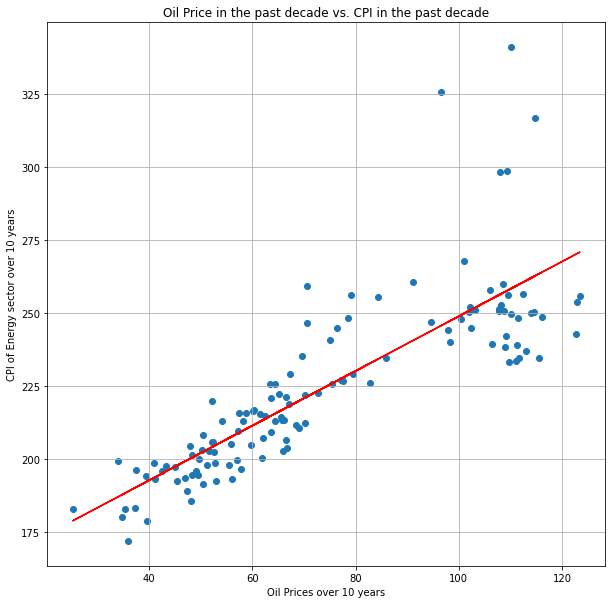

In [124]:
#Scatter graph Oil Prices vs CPI All Items with Linear Regression 
x_values = inflation_df["Oil Price"]
y_values = inflation_df["cpi_energy"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept 
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize = (10,10))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,"r-")

plt.annotate(line_eq,(20,10),fontsize=15,color="red")

plt.title("Oil Price in the past decade vs. CPI in the past decade")
plt.xlabel("Oil Prices over 10 years")
plt.ylabel("CPI of Energy sector over 10 years")
plt.grid()

print(f"The r-square is: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.savefig("../Project 1 Code/Images/oil_energy_scatter.png")
plt.show()

The r-square is: 0.04545003522882112
The correlation between both factors is -0.21


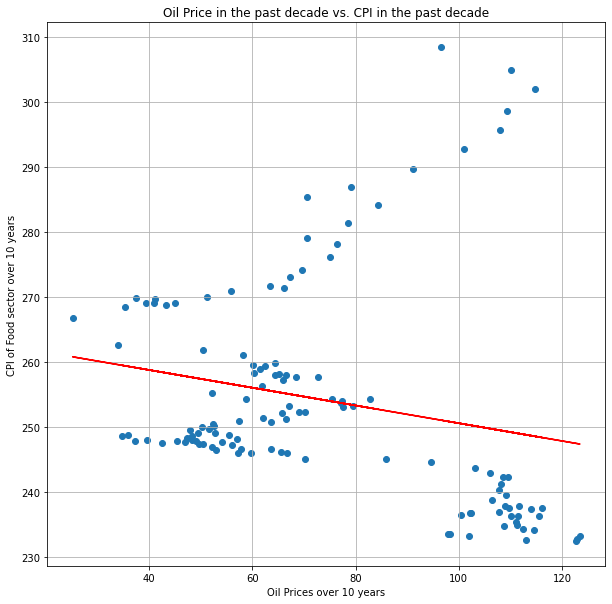

In [125]:
#Scatter graph Oil Prices vs CPI All Items with Linear Reression 
x_values = inflation_df["Oil Price"]
y_values = inflation_df["cpi_food"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept 
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize = (10,10))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,"r-")

plt.annotate(line_eq,(20,10),fontsize=15,color="red")

plt.title("Oil Price in the past decade vs. CPI in the past decade")
plt.xlabel("Oil Prices over 10 years")
plt.ylabel("CPI of Food sector over 10 years")
plt.grid()

print(f"The r-square is: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.savefig("../Project 1 Code/Images/oil_food_scatter.png")
plt.show()

The r-square is: 0.8249446809610522
The correlation between both factors is 0.91


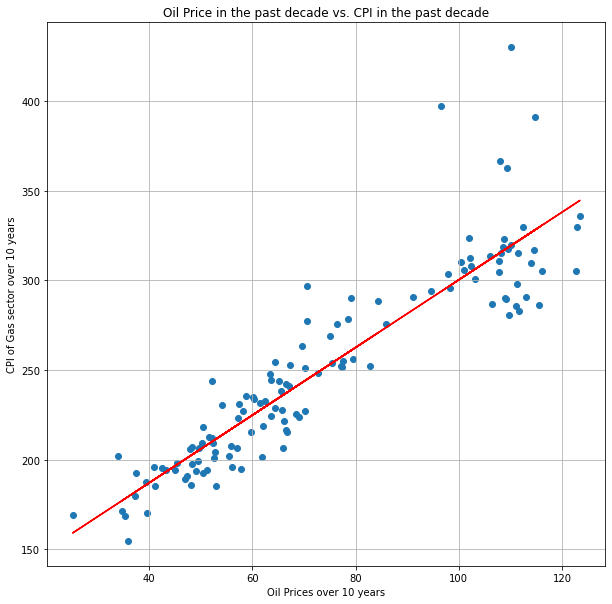

In [126]:
#Scatter graph Oil Prices vs CPI All Items with Linear Reression 
x_values = inflation_df["Oil Price"]
y_values = inflation_df["cpi_gas"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept 
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize = (10,10))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,"r-")

plt.annotate(line_eq,(20,10),fontsize=15,color="red")

plt.title("Oil Price in the past decade vs. CPI in the past decade")
plt.xlabel("Oil Prices over 10 years")
plt.ylabel("CPI of Gas sector over 10 years")
plt.grid()

print(f"The r-square is: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.savefig("../Project 1 Code/Images/oil_gas_scatter.png")
plt.show()

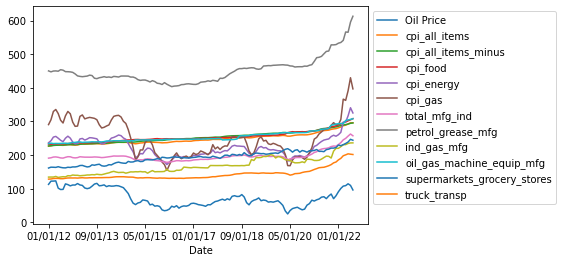

<Figure size 432x288 with 0 Axes>

In [127]:
# Mult-Line Graph for Oil prices, CPI All items, and PPI MFG
inflation_df.plot(label="Price trend over past 10 years")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

plt.savefig("../Project 1 Code/Images/line_price.png")